In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import pyecharts.charts as pys 
import pyecharts.options as opts 

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

1、 读入数据suiside.csv

In [3]:
suicide = pd.read_csv('./suicide.csv')

In [4]:
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


2、 画出堆栈柱状图，展示2010年到2015年自杀总数排名前5的国家在每年的占比情况。

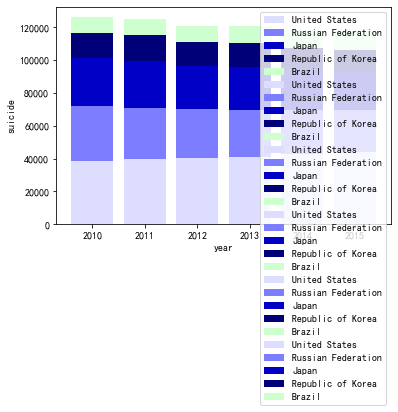

In [5]:
suicide = pd.read_csv('/root/dvexp/suicide.csv')
suicide_10_15 = suicide[(suicide['year'] >= 2010) & (suicide['year'] <= 2015)] 
suicide_top5 = suicide_10_15.groupby('country')['suicides_no'].sum().sort_values(ascending = False).head(5)
country_top5 = suicide_top5.index

pop = []
data = pd.Series([],dtype=np.float64)
for i in country_top5:
    pop = suicide_10_15[suicide_10_15['country']==i].groupby(['year','country'])
    pop = pop['suicides_no'].sum()
    data = pd.concat([data,pop])
    # print(pop.values)
colors = ['#DDDDFF','#7D7DFF','#0000C6','#000079','#CEFFCE']
for year in range(2010,2016):
    bot = 0
    y=0
    for j in country_top5:
        plt.bar(year,data[year,j],align='center',bottom=bot,label=j,color=colors[y])
        bot=bot+data[year,j]
        y+=1
plt.legend()
plt.xlabel('year')
plt.ylabel('suicide')
plt.show()

3、	画出散点图，展示美国每年的自杀人数与GDP的关系。

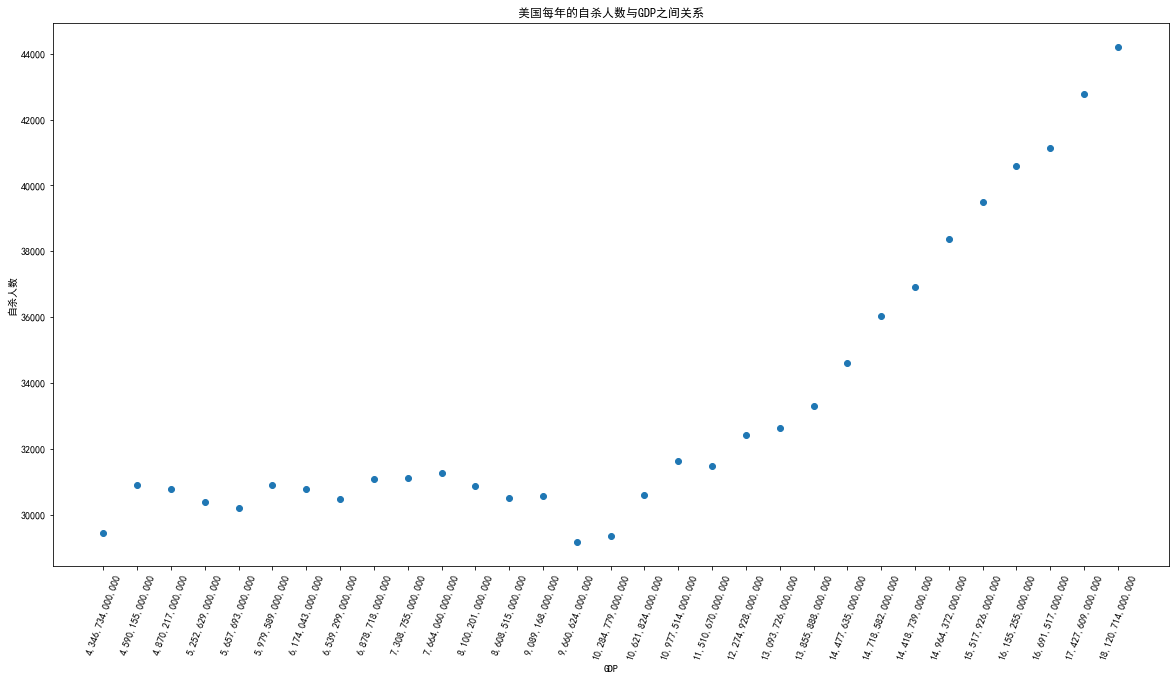

In [6]:
df_suicide = suicide[suicide['country'] == 'United States']
df = df_suicide.groupby('year')['suicides_no'].sum()
year_gdp = []
for i in df.index:
    year_gdp.append(df_suicide[df_suicide['year'] == i][' gdp_for_year ($) '].tolist()[0]) 
year_gdp
plt.figure(figsize = (20, 10))
plt.scatter(x = year_gdp, y = df.values)
plt.xticks(fontsize=10,rotation=70)
plt.xlabel('GDP')
plt.ylabel('自杀人数')
plt.title('美国每年的自杀人数与GDP之间关系')
plt.show()

4、	 画出共享x轴的两行一列的子图，上子图展示1995年-2015年美国GDP的变化趋势，下子图展示1995年-2015年美国自杀人数的变化趋势。

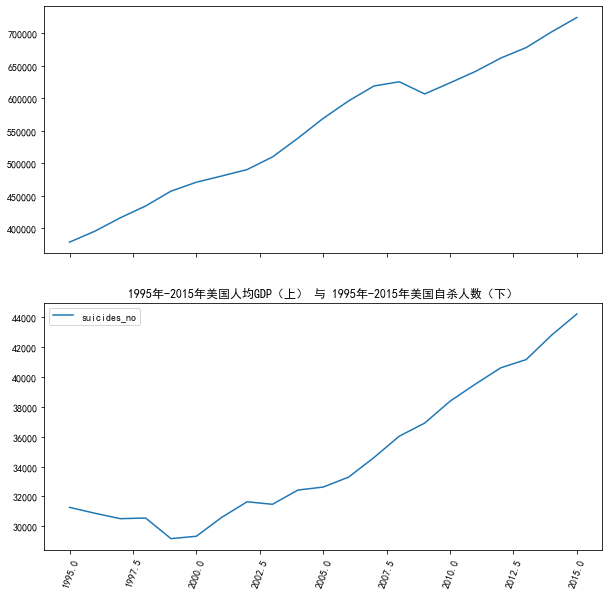

In [7]:
data = suicide[(suicide['country'] == 'United States') & (suicide['year']>=1995)&(suicide['year']<=2015)] 
data2 = data.groupby('year').sum()

fig, axes = plt.subplots(2, 1, sharex = True, figsize = (10, 10)) 
axes[0].plot(data2.index,data2['gdp_per_capita ($)'].values,label='gdp_per_capita ($)')
axes[1].plot(data2.index,data2['suicides_no'].values,label='suicides_no')
# print(data2)
plt.title('1995年-2015年美国人均GDP（上） 与 1995年-2015年美国自杀人数（下）')
plt.xticks(fontsize=10,rotation=70)
plt.legend()

5、展示美国自身人数中各年龄段及性别的对比情况。

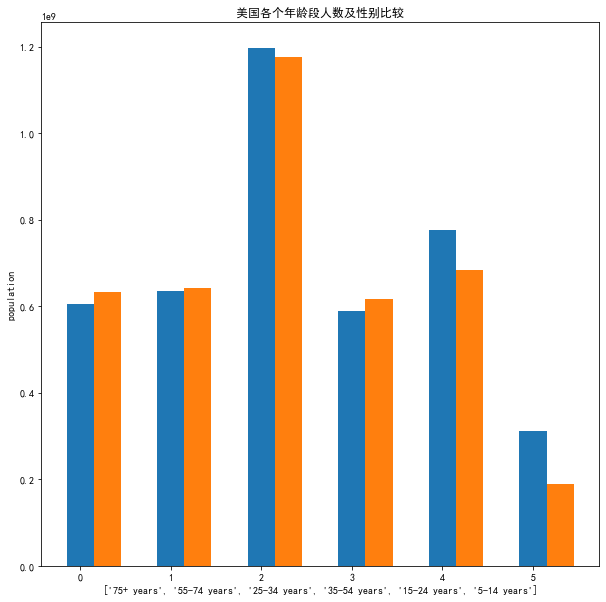

In [9]:
us = suicide[suicide['country'] == 'United States']
df5 = us.groupby(['sex', 'age'])['population'].sum()

age = us['age'].unique().tolist()
male = df5[0 : len(age)]
female = df5[len(age):]

x = np.arange(len(age))
plt.figure(figsize = (10, 10)) 
plt.bar(x, male, width = 0.3) 
plt.bar(x+0.3, female, width = 0.3) 
plt.title('美国各个年龄段人数及性别比较')
plt.xlabel(age) 
plt.ylabel('population')
plt.show()

6、在一张图中展示2015年各国自杀总数（柱状图）与平均每年自杀人数（折线图）。

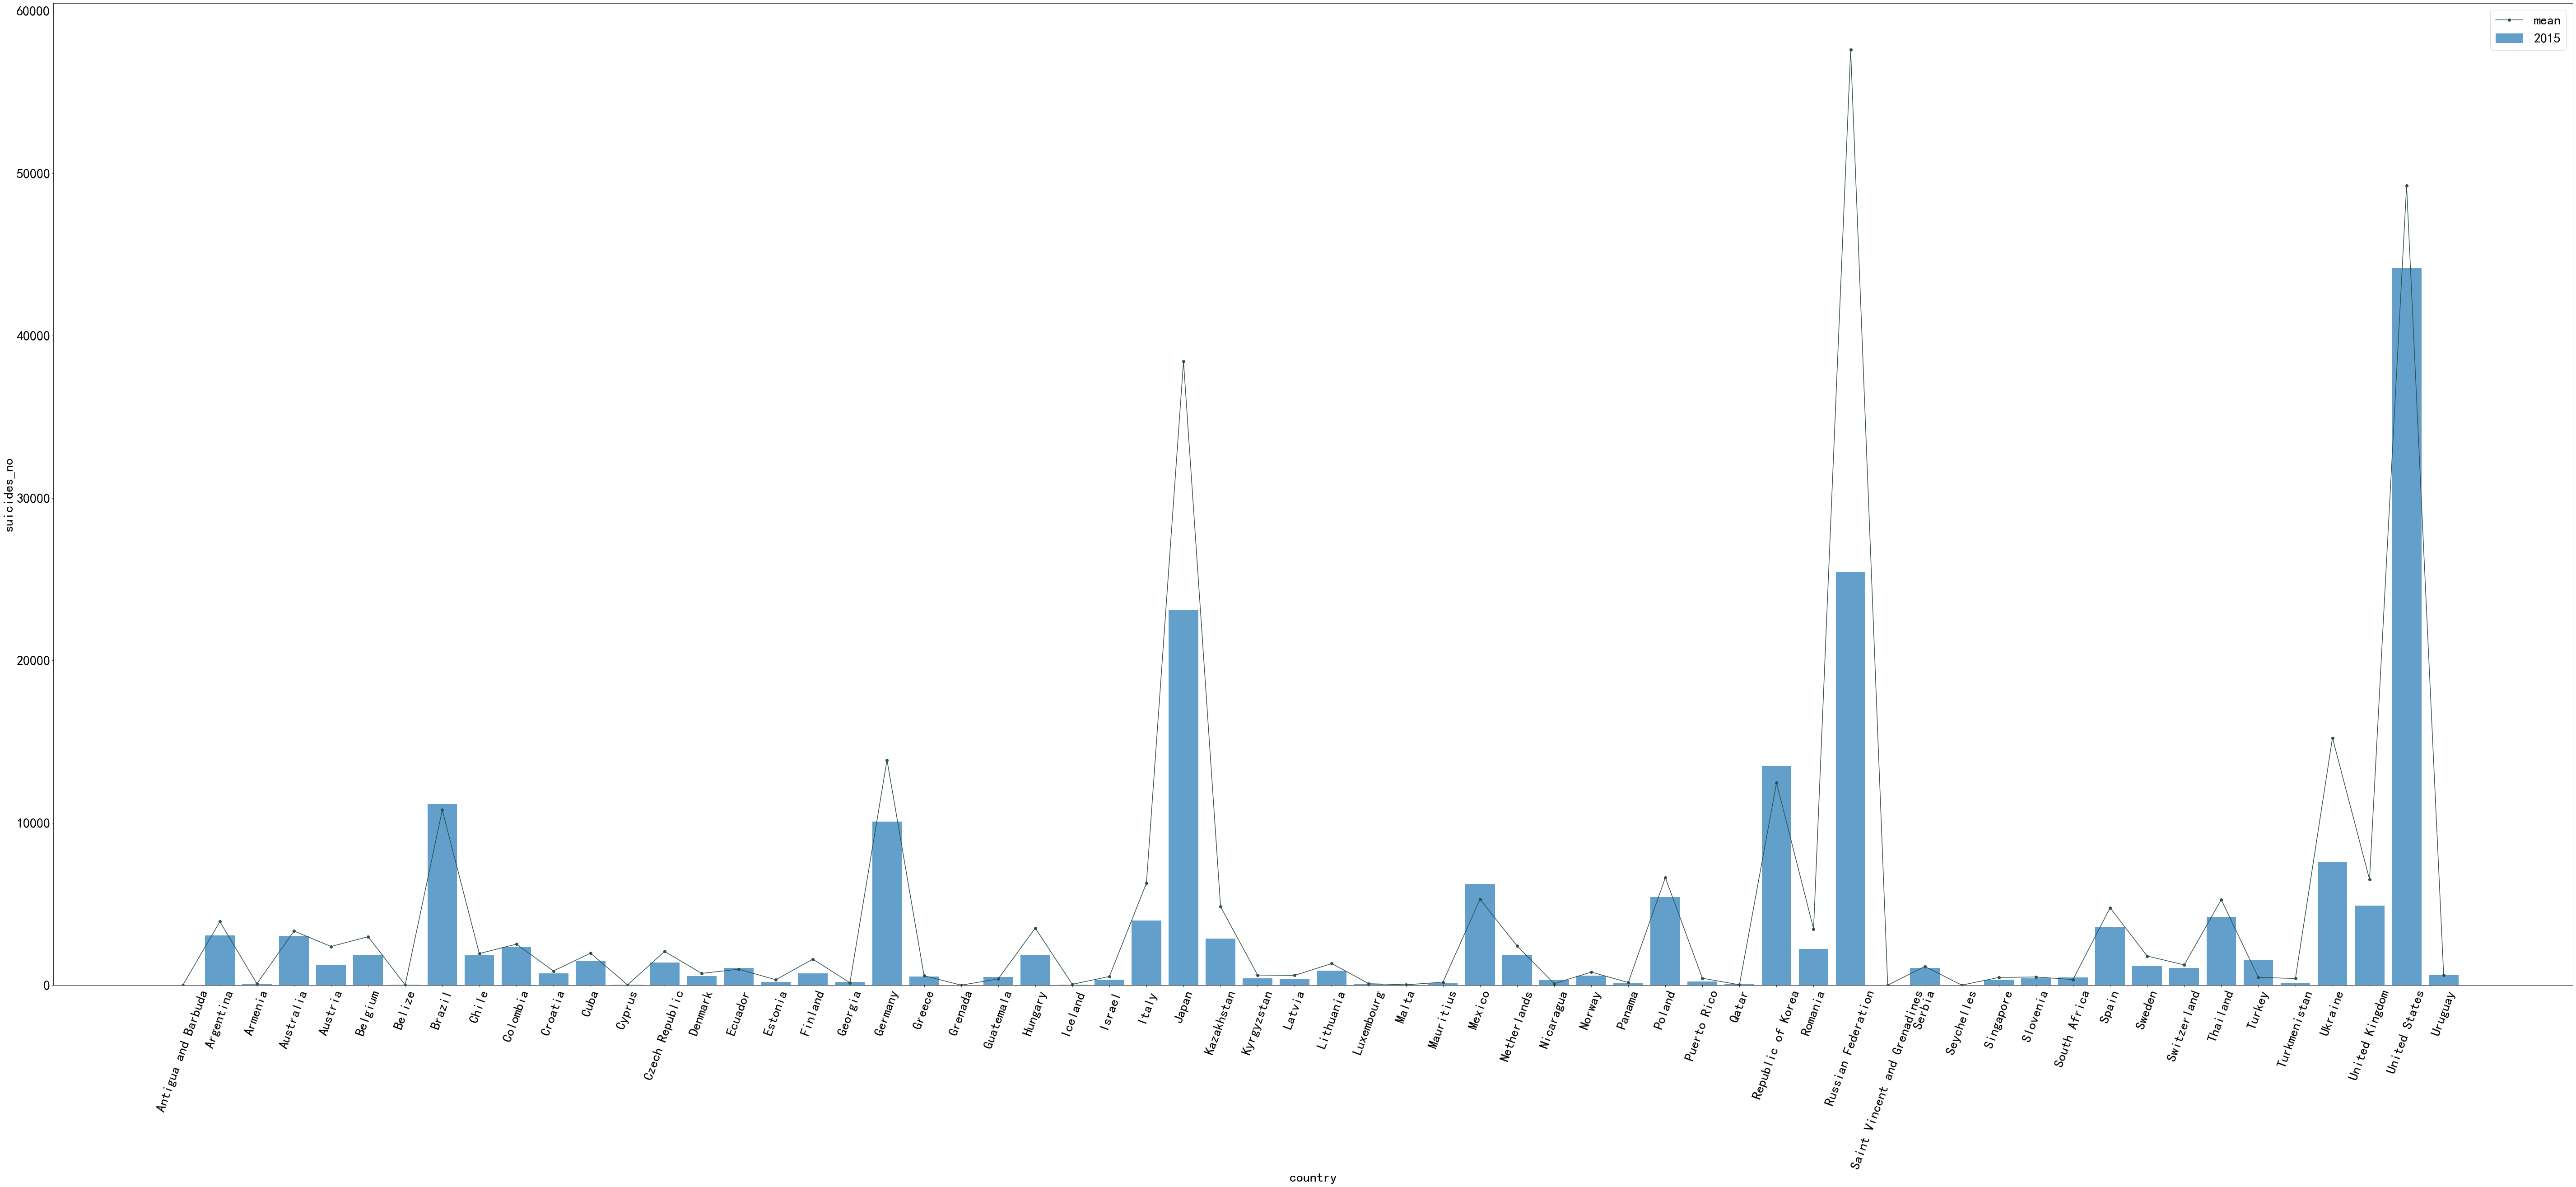

In [11]:
df6=suicide[suicide['year']==2015].filter(items=['country','suicides_no'])
df6=df6.groupby('country').sum()

df7=suicide.filter(items=['country','suicides_no']).groupby('country').sum()
df7['suicides_no']=df7['suicides_no']/len(set(data['year']))
df7.columns=['mean']

df6=df6.join(df7)

plt.figure(figsize=(100,40))
plt.bar(df6.index,df6['suicides_no'],alpha=0.7,label='2015')
plt.plot(df6.index,df6['mean'],color='darkslategray',marker='o',label='mean')
plt.legend(fontsize=30)
plt.xlabel('country',fontsize=30)
plt.ylabel('suicides_no',fontsize=30)
plt.xticks(fontsize=30,rotation=70)
plt.yticks(fontsize=30)
plt.show()